In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from matplotlib import font_manager, rc, cm

font_path = './font/GmarketSansTTFMedium.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [90]:
data = pd.read_excel('./data/전세보증금반환보증실적.xlsx')
data = data.set_index('지역').T
data

지역,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,전국,6대광역시 및 세종특별자치시
2018년 건수,25980,5976,2675,10849,1154,990,1082,250,32990,582,963,1111,662,406,1348,2223,110,89351,22976
2018년 금액,63494,11326,5468,20851,2167,1805,1798,381,72149,920,1541,1566,1033,570,1796,3306,195,190367,43796
2019년 건수,43766,9499,3549,18772,2127,2058,1926,596,56250,1549,2084,2785,1467,879,3210,5111,467,150095,38527
2019년 금액,101889,17284,6975,32278,3670,3397,2781,914,113614,2090,2906,3704,2088,1101,4135,6951,665,306444,67299
2020년 건수,48930,10480,3843,25621,2023,2199,2330,898,61542,1695,2595,3400,2138,909,4136,5932,703,179374,47394
2020년 금액,115995,19944,8152,48182,3637,4311,4038,1858,133238,2437,4215,5391,3575,1333,6182,8976,1132,372595,90122
2021년 7월 기준 건수,36164,8288,2985,19011,1570,1816,1852,851,44963,1444,2220,2656,1674,832,3488,5215,573,135602,36373
2017년 7월 기준 금액,86336,16331,6747,36252,3201,3842,3676,2207,107607,2355,4028,4840,3041,1343,6316,9177,1023,298321,72256


In [92]:
df = data[['전국', '서울', '경기', '6대광역시 및 세종특별자치시']]
df = df.iloc[[0,2,4,6],:]
df

지역,전국,서울,경기,6대광역시 및 세종특별자치시
2018년 건수,89351,25980,32990,22976
2019년 건수,150095,43766,56250,38527
2020년 건수,179374,48930,61542,47394
2021년 7월 기준 건수,135602,36164,44963,36373


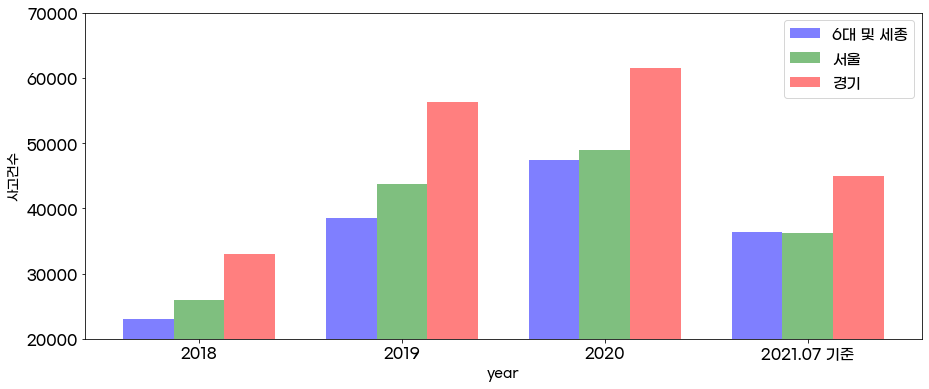

In [140]:
colors = sns.color_palette('Blues',len(data.columns))

fig, ax = plt.subplots(figsize=(15,6))
bar_width = 0.25

# 연도가 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(4)
year = ['2018', '2019', '2020', '2021.07 기준']

b2 = plt.bar(index, df['6대광역시 및 세종특별자치시'], bar_width, alpha=0.5, color='blue', label='6대 및 세종')

b3 = plt.bar(index + bar_width, df['서울'], bar_width, alpha=0.5, color='green', label='서울')

b4 = plt.bar(index + 2 * bar_width, df['경기'], bar_width, alpha=0.5, color='red', label='경기')

# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width, 4 + bar_width, 1), year)

# x축, y축 이름 및 범례 설정
plt.xlabel('year', size = 13)
plt.ylabel('사고건수', size = 13)
plt.legend(loc='best')
plt.ylim(20000, 70000)
plt.show()

In [70]:
data = pd.read_csv('./data/깡통전세_사고현황.csv', encoding='CP949')
df = data[data['보증종류'] == '전세보증금반환보증']
df['건수'] = df['건수'].astype('int64')
df['금액(억원)'] = df['금액(억원)'].astype('int64')
df

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5296\1583340496.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['건수'] = df['건수'].astype('int64')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5296\1583340496.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['금액(억원)'] = df['금액(억원)'].astype('int64')


,연도,보증종류,건수,금액(억원)
17,2016년,전세보증금반환보증,27,34
38,2017년,전세보증금반환보증,33,74
59,2018년,전세보증금반환보증,372,792
81,2019년,전세보증금반환보증,1630,3442
104,2020년,전세보증금반환보증,2408,4682
108,2021년,전세보증금반환보증,2799,5790


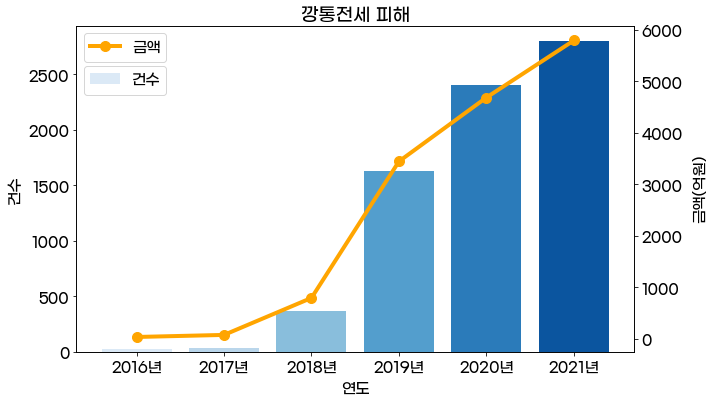

In [75]:
colors = sns.color_palette('Blues',len(df['연도']))

plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10, 6)

fig, ax1 = plt.subplots()

ax1.bar(df['연도'], df['건수'], color=colors, label='건수')
ax1.legend(loc='upper left', bbox_to_anchor=(0, 0.9))
ax1.set_xlabel('연도')
ax1.set_ylabel('건수')

ax2 = ax1.twinx()
ax2.plot(df['연도'], df['금액(억원)'], linewidth=4, color ='orange', marker='o', markersize=10, label='금액')
ax2.legend(loc='upper left')
ax2.set_ylabel('금액(억원)', labelpad=10)

plt.title('깡통전세 피해')
plt.show()